In [50]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [51]:
path_full = "credits-clean.csv"
full_data = pd.read_csv(path_full)
df = full_data

bar_width = 0.25

# Distribution of Credit Class by Personal Status
- Count the occurrences of 'good' and 'bad' for each unique entry in the 'personal_status' field.
- Group them together for easy displaying.
- Plot as a double bar chart.

## Counts
Using the .value_counts() we can calculate the occurrences of each credit class for each unique personal status.

In [52]:
counts_good_personal_status = df[df['class'] == 'good']['personal_status'].value_counts()
counts_bad_personal_status = df[df['class'] == 'bad']['personal_status'].value_counts()

## Data Preperation
Plotting is done using a double-bar chart. This way we can more easily and effectively display what is most important. This also acts like a point of comparison between the two credit classes.
A width parameter is necessary to avoid bars overlapping with each other on the same x-values.

### Decoration
First the actual figure is created along with an axes. Some decoration is created; title, and labels.

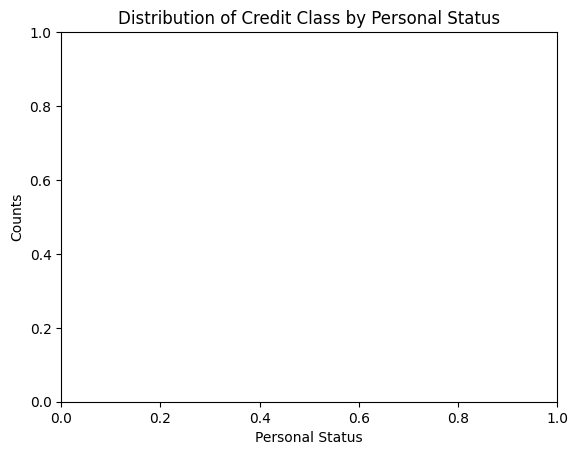

In [53]:
fig_personal_status, g1 = plt.subplots()
g1.set_title("Distribution of Credit Class by Personal Status")
g1.set_xlabel("Personal Status")
g1.set_ylabel("Counts");

### X-Axis Labels
The X-axis labels have to be evenly arranged, for this the .set_xticks() function is used to tell pyplot where to set the x-axis labels.
The .unique() pandas function is used to get all the unique saving_status entries. These are then used as x-axis labels from where the bar charts will have their roots.

In [54]:
statuses = df['personal_status'].unique()
x = np.arange(len(statuses))
g1.set_xticks(x)
g1.set_xticklabels(statuses)

[Text(0, 0, "'male single'"),
 Text(1, 0, "'female div/dep/mar'"),
 Text(2, 0, "'male div/sep'"),
 Text(3, 0, "'male mar/wid'")]

## Plotting

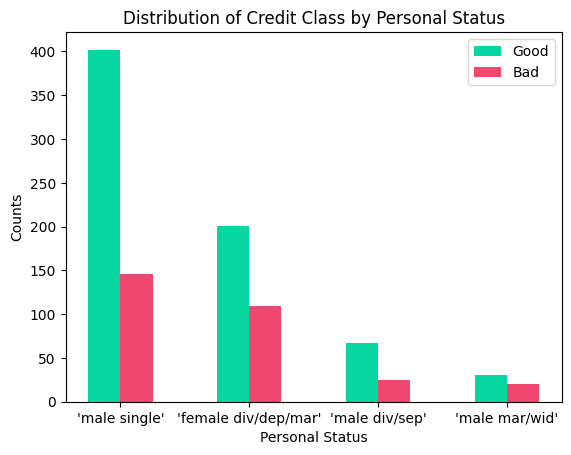

In [55]:
# Plotting the finished data.
g1.bar(x - bar_width/2, counts_good_personal_status, bar_width, label='Good', color='#06d6a0')
g1.bar(x + bar_width/2, counts_bad_personal_status, bar_width, label='Bad', color='#ef476f')
g1.legend()

fig_personal_status

# Distribution of Credit Class by Saving Status
- Count the occurrences of 'good' and 'bad' for each unique entry in the 'saving_status' field.
- Group them together for easy displaying.
- Plot as a double bar chart.
- *(this is the same as the task above just with a different field)*.

## Counting
Counting is done the same way as the chart above.

In [56]:
# Counting
counts_good_saving_status = df[df['class'] == 'good']['saving_status'].value_counts()
counts_bad_saving_status = df[df['class'] == 'bad']['saving_status'].value_counts()

## Data Preperation

### Decoration
First the actual figure is created along with an axes. Some decoration is created; title, and labels.

Text(0, 0.5, 'Counts')

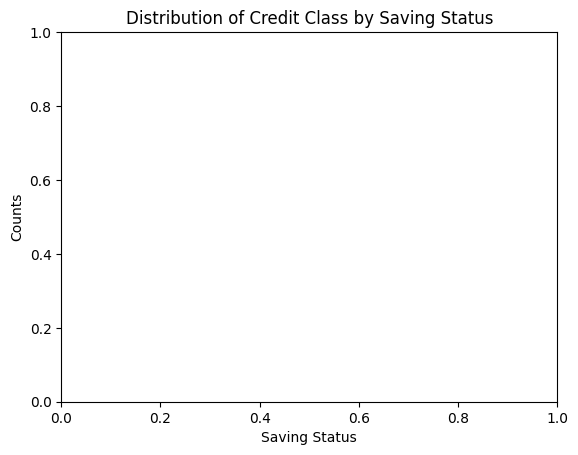

In [57]:
fig_saving_status, g2 = plt.subplots()
g2.set_title("Distribution of Credit Class by Saving Status")
g2.set_xlabel("Saving Status")
g2.set_ylabel("Counts")

### X-Axis Labels
The X-axis labels have to be evenly arranged, for this the .set_xticks() function is used to tell pyplot where to set the x-axis labels.
The .unique() pandas function is used to get all the unique saving_status entries. These are then used as x-axis labels from where the bar charts will have their roots.

In [58]:
statuses = df['saving_status'].unique()
x = np.arange(len(statuses))
g2.set_xticks(x)
g2.set_xticklabels(statuses)

[Text(0, 0, "'no known savings'"),
 Text(1, 0, "'<100'"),
 Text(2, 0, "'500<=X<1000'"),
 Text(3, 0, "'>=1000'"),
 Text(4, 0, "'100<=X<500'")]

## Plotting

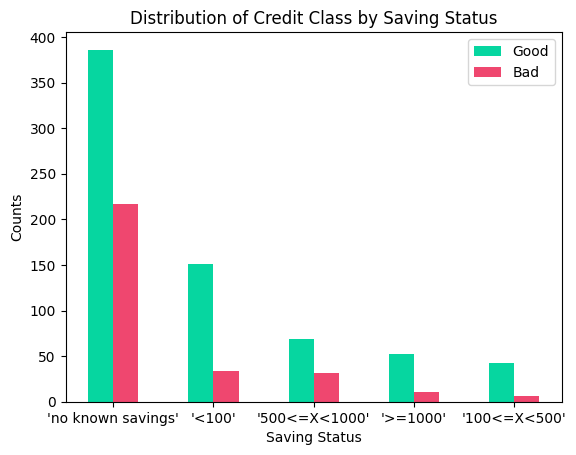

In [59]:
# Plotting here.
g2.bar(x - bar_width/2, counts_good_saving_status, bar_width, label='Good', color='#06d6a0')
g2.bar(x + bar_width/2, counts_bad_saving_status, bar_width, label='Bad', color='#ef476f')
g2.legend()

fig_saving_status